In [159]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon, friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
METRIC_TO_DROP = 'pr_rec_score' #pr_rec_score, matthews_corrcoef

ipf = pd.read_csv("IPF.csv",header=[0,1,2],index_col=0)
ipf = ipf.drop(columns=[c[0] for c in ipf.columns if 'ens' in c[0]],level=0)
ipf = ipf.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
print(f"ipf:{ipf.shape}")

ipf:(32, 30)


In [76]:
ihf = pd.read_csv("IHFilter.csv",header=[0,1,2],index_col=0)
ihf = ihf.drop(columns=[c[0] for c in ihf.columns if 'ens' in c[0]],level=0)
ihf = ihf.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
print(f"ihf:{ihf.shape}")

ihf:(32, 30)


In [48]:
clni = pd.read_csv("CLNI_consensus.csv",header=[0,1,2],index_col=0)
clni = clni.drop(columns=[c[0] for c in clni.columns if 'ens' in c[0]],level=0)
clni = clni.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
print(f"clni:{clni.shape}")

clni:(32, 30)


In [77]:
none = pd.read_csv("Noisy.csv",header=[0,1,2],index_col=0)
none = none.drop(columns=[c[0] for c in ipf.columns if 'ens' in c[0]],level=0)
none = none.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
none.shape

(32, 30)

In [82]:
built3 = pd.read_csv("Builtin3.csv",header=[0,1,2],index_col=0)
built3 = built3.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
built3.shape

(32, 18)

In [64]:
spyder = pd.read_csv("Spyder.csv",header=[0,1,2],index_col=0)
spyder = spyder.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
spyder = spyder.droplevel(0,axis=1)
spyder.shape

(32, 6)

In [67]:
ncl = pd.read_csv("Tackling.csv",header=[0,1,2],index_col=0)
ncl = ncl.drop(columns=[METRIC_TO_DROP],level=2).droplevel(2,axis=1) 
ncl = ncl.droplevel(0,axis=1)
ncl.shape

(32, 6)

In [83]:
enn = built3['ENN']
smote_enc = built3['SmoteEnc']
IHThreshold = built3['IHThreshold']

In [51]:
smote_ipf = ipf['smote']

In [78]:
ipf = ipf.max(axis=1,level=1)
ihf = ihf.max(axis=1,level=1)
none = none.max(axis=1,level=1)

In [97]:
focused = {'spyder':spyder,'smote_ipf':smote_ipf,'smote_enc':smote_enc}
general = {'ipf':ipf,'ihf':ihf} #CLNI Pending
one_sided  = {'ihthres':IHThreshold,'enn':enn,'ncl':ncl} 
nofil = {'none':none}  
filters = {**focused,**general,**one_sided,**nofil}
len(filters)

9

In [181]:
for f,d in filters.items():
    print(f,d.shape,d.isna().sum().sum(),(d<.05).sum().sum())

spyder (32, 6) 0 1
smote_ipf (32, 6) 0 0
smote_enc (32, 6) 0 0
ipf (32, 6) 0 0
ihf (32, 6) 0 0
ihthres (32, 6) 0 0
enn (32, 6) 0 3
ncl (32, 6) 0 3
none (32, 6) 0 0


0

In [104]:
df = pd.concat(filters,axis=1)
df.shape

(32, 54)

In [183]:
df.to_csv("All_filter_MCC.csv")

## Classifier-based View

1.73872212588504e-116
{'spyder': 8.901322645310233e-28, 'smote_ipf': 3.2993613794803585e-05, 'smote_enc': 2.1024347849663918e-22, 'ipf': 4.019449101471296e-05, 'ihf': 1.10824625171934e-18, 'ihthres': 5.271724651335831e-16, 'enn': 5.52737667638245e-23, 'ncl': 4.3495247860092086e-16}


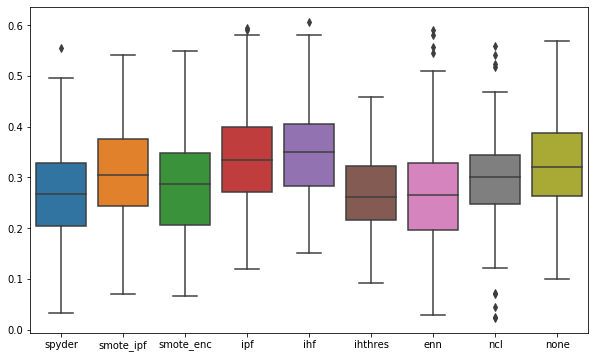

In [185]:
filt = pd.DataFrame({k:df[k].values.reshape(-1) for k in filters.keys()})
print(friedmanchisquare(*(filt[c] for c in filt)).pvalue)
print({c:wilcoxon(filt[c],filt['none']).pvalue for c in filt if c!='none'})
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

In [186]:
def plot_clf(name):
    clf = df.loc[:,(slice(None),name)].droplevel(1,axis=1)
    print(friedmanchisquare(*(clf[c] for c in clf)).pvalue)
    print({c:wilcoxon(clf[c],clf['none']).pvalue for c in clf if c!='none'})
    plt.figure(figsize=(10,6))
    sns.boxplot(data=clf-clf['none']);

7.157595659154937e-30
{'spyder': 2.584840238540738e-05, 'smote_ipf': 0.000816587342056862, 'smote_enc': 0.32166418873785163, 'ipf': 2.236017678609001e-06, 'ihf': 7.952884142692727e-07, 'ihthres': 0.23141097273990163, 'enn': 0.00015861038317621005, 'ncl': 0.0070887207939894425}


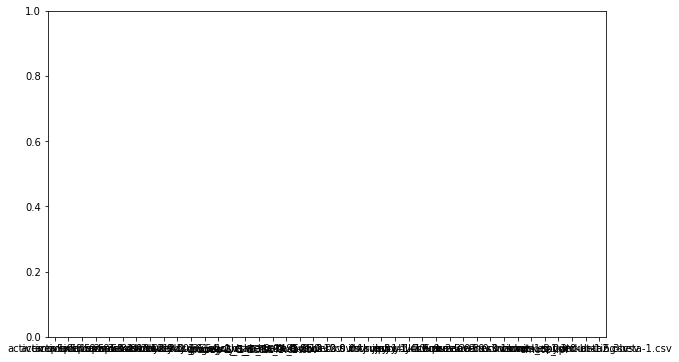

In [187]:
plot_clf('dt')

3.4291489686761334e-22
{'spyder': 1.5426686641940257e-06, 'smote_ipf': 0.009345420962008471, 'smote_enc': 2.686568369890669e-06, 'ipf': 0.07566712953403203, 'ihf': 0.00014711781899667367, 'ihthres': 0.0019090783976280922, 'enn': 7.198082552558243e-06, 'ncl': 3.89254750182187e-05}


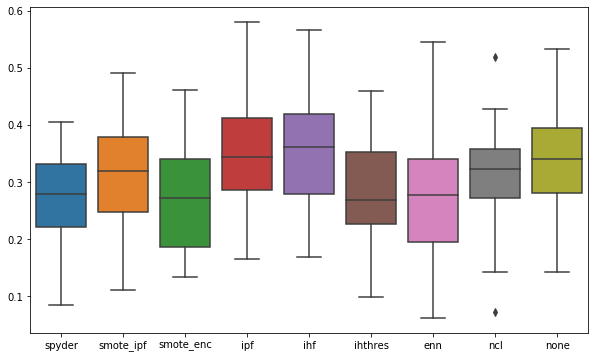

In [170]:
plot_clf('lr')

1.481493187807758e-22
{'spyder': 2.807269822428798e-05, 'smote_ipf': 0.003533765604166998, 'smote_enc': 1.5426686641940257e-06, 'ipf': 0.340262898334838, 'ihf': 0.005333949505961723, 'ihthres': 9.626574784701925e-07, 'enn': 2.013772445250702e-05, 'ncl': 7.964151017818719e-05}


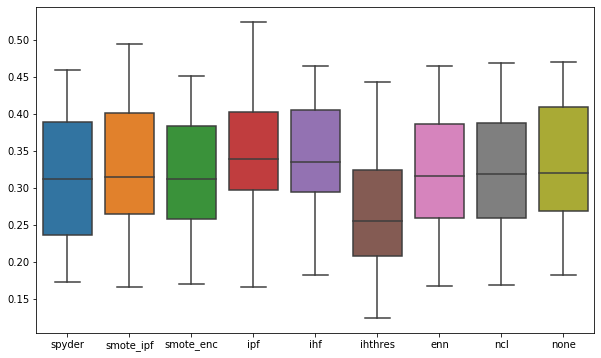

In [171]:
plot_clf('nb')

1.7169050078663744e-13
{'spyder': 1.8585186011916284e-06, 'smote_ipf': 3.307877015483619e-05, 'smote_enc': 0.0029477819936724464, 'ipf': 0.12065935152258303, 'ihf': 0.0021648945219404103, 'ihthres': 8.609160404929316e-05, 'enn': 9.303311258070505e-05, 'ncl': 0.0005415735513857811}


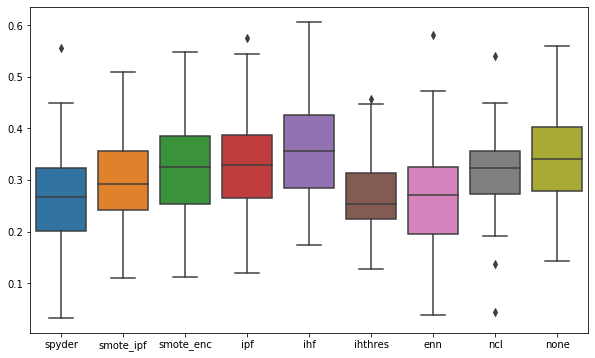

In [172]:
plot_clf('rf')

2.2812022175602332e-14
{'spyder': 0.00035494593442526585, 'smote_ipf': 3.89254750182187e-05, 'smote_enc': 1.1636759458843798e-06, 'ipf': 0.04746943502928874, 'ihf': 0.8516689455054184, 'ihthres': 9.35152738507815e-06, 'enn': 5.3686202226740976e-05, 'ncl': 0.0017918633580784956}


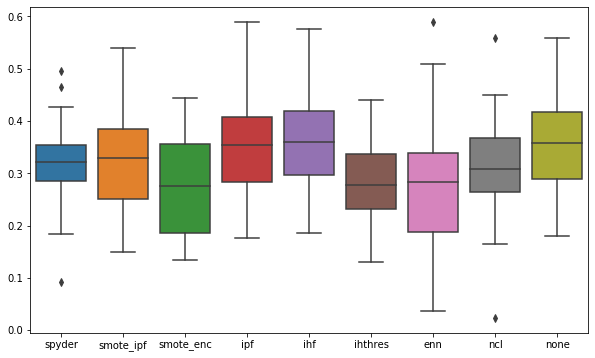

In [173]:
plot_clf('svm')

9.916626340550397e-28
{'spyder': 7.952884142692727e-07, 'smote_ipf': 0.489024767285019, 'smote_enc': 3.8626680855459005e-06, 'ipf': 0.0006218381179514873, 'ihf': 3.89254750182187e-05, 'ihthres': 0.06687754220502676, 'enn': 6.592292025466918e-06, 'ncl': 0.00043909096077753636}


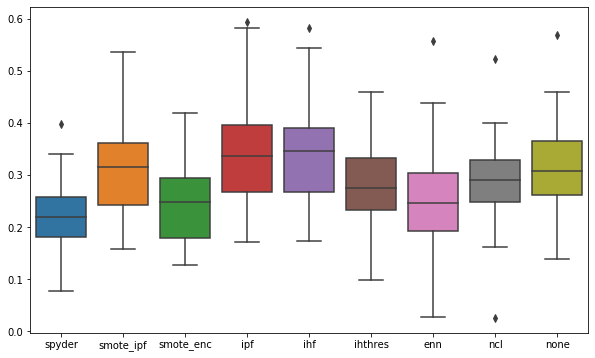

In [174]:
plot_clf('knn')

## Filter-based View

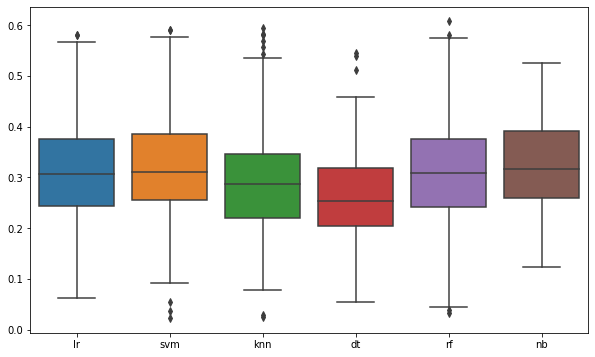

In [154]:
CLFS = set(df.columns.get_level_values(1))
d = {c:df.loc[:,(slice(None),c)].droplevel(1,axis=1).values.reshape(-1) for c in CLFS}
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.DataFrame(d));

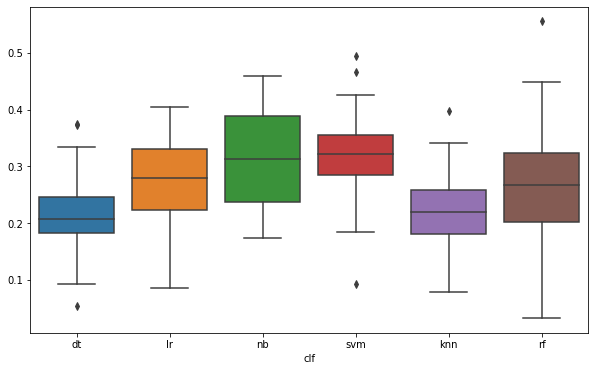

In [135]:
filt = df['spyder']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

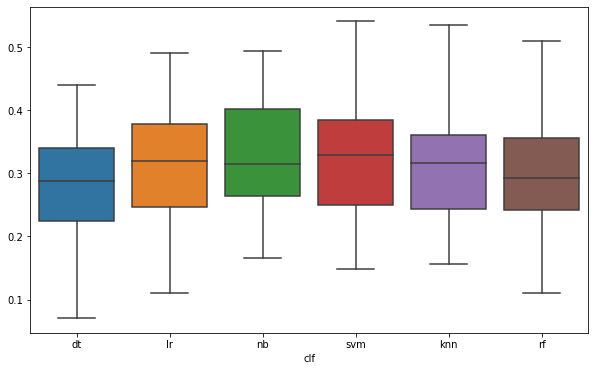

In [136]:
filt = df['smote_ipf']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

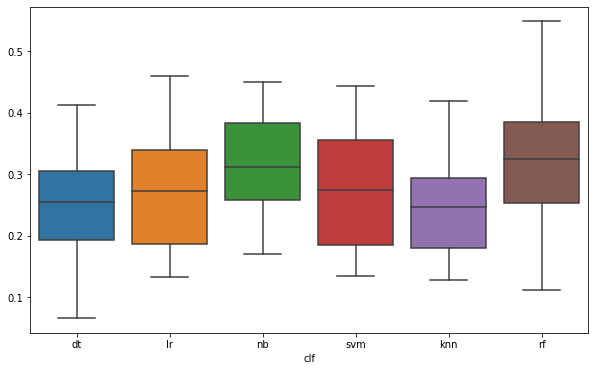

In [137]:
filt = df['smote_enc']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

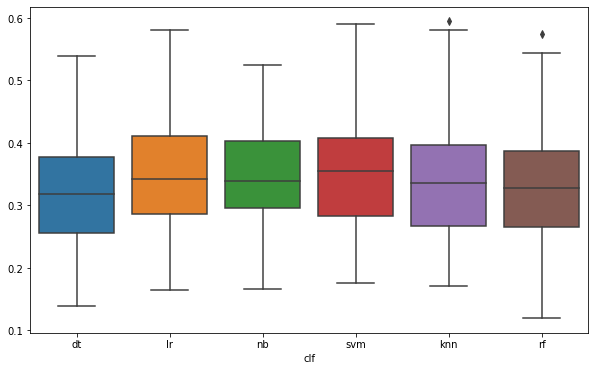

In [138]:
filt = df['ipf']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

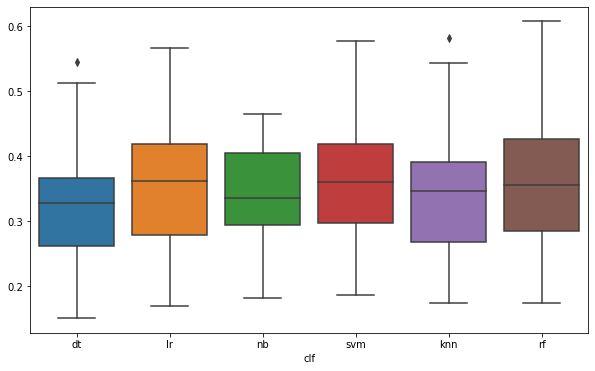

In [139]:
filt = df['ihf']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

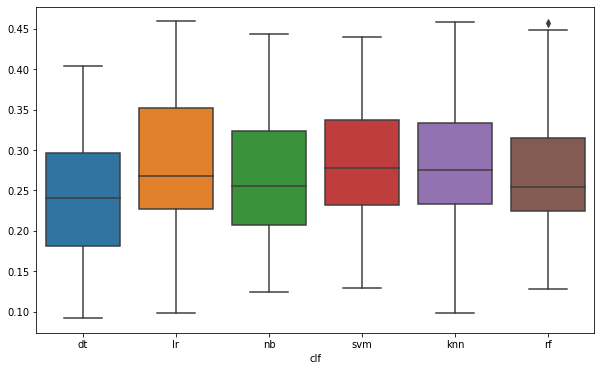

In [140]:
filt = df['ihthres']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

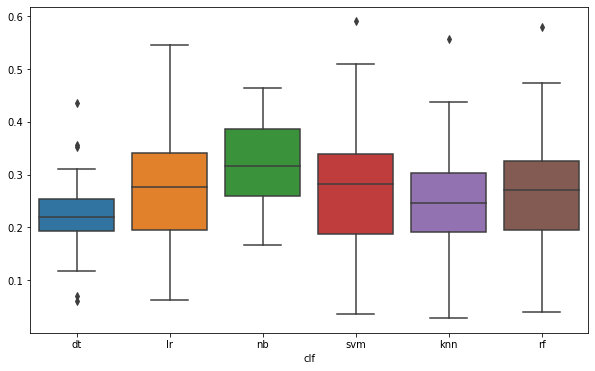

In [141]:
filt = df['enn']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

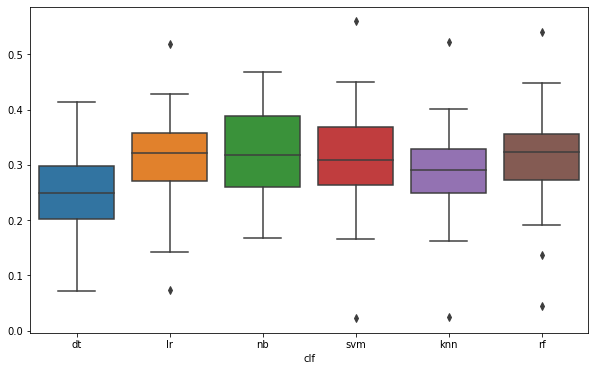

In [142]:
filt = df['ncl']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);

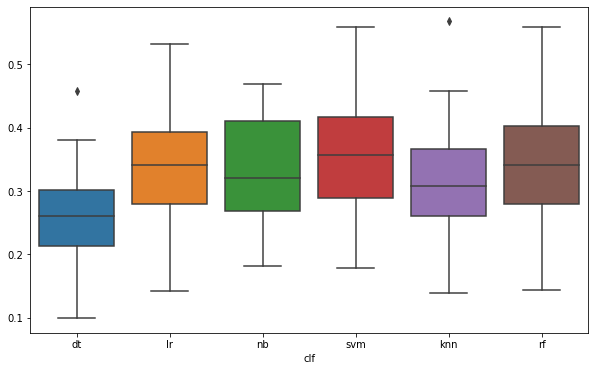

In [143]:
filt = df['none']
plt.figure(figsize=(10,6))
sns.boxplot(data=filt);